<a href="https://colab.research.google.com/github/dedybayu/DedyBayu_PCVK_Genap_2025/blob/main/PCVK_Week1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as pd
import pandas as pd
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
from skimage import transform
from PIL import Image
import matplotlib.pyplot as plt

# Step 2

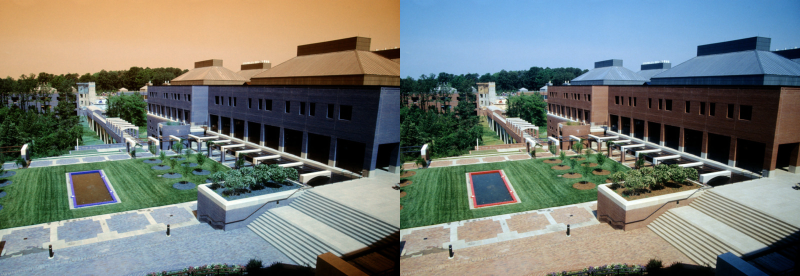

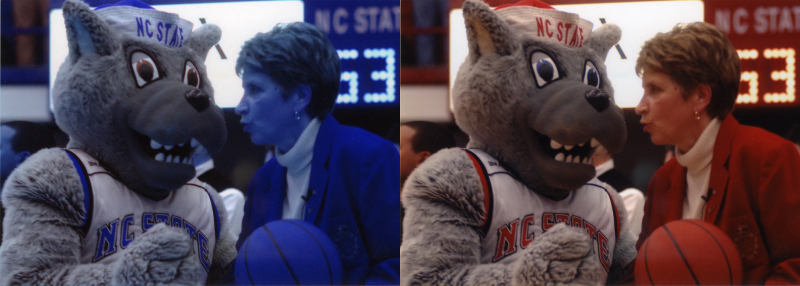

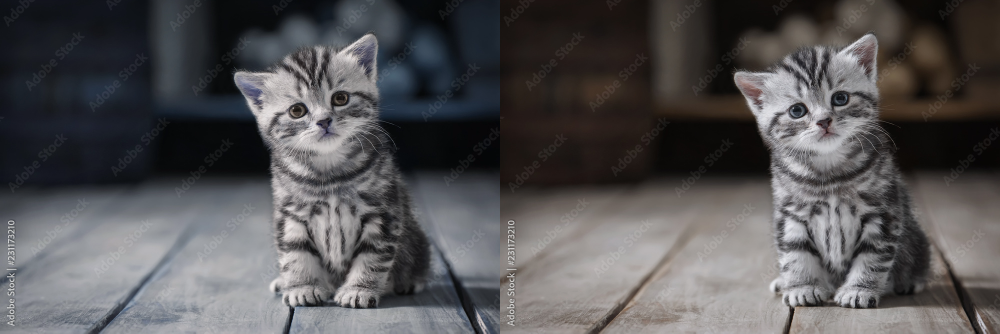

In [2]:
urls = ["https://iiif.lib.ncsu.edu/iiif/0052574/full/800,/0/default.jpg",
        "https://iiif.lib.ncsu.edu/iiif/0016007/full/800,/0/default.jpg",
        "https://as1.ftcdn.net/v2/jpg/02/31/17/32/1000_F_231173210_stzZNH7tblr3esfej44EpbKqAQfbkfsT.jpg"]

for url in urls:
  image = io.imread(url)
  image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
  image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
  final_frame = cv.hconcat([image, image_2])
  cv2_imshow(final_frame)
  print("\n")


# Step 3

Resolusi image: tinggi x lebar =  334  x  500


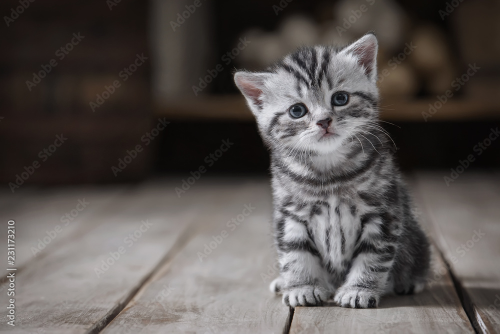

In [3]:
tinggi = image_2.shape[0]
lebar = image_2.shape[1]
print("Resolusi image: tinggi x lebar = ", tinggi, " x ", lebar)
cv2_imshow(image_2)


# Step 4

In [4]:
# image_4 = image.copy()
# image_cros_1 = image.copy()
# image_line_1 = image.copy()
# image_box_1 = image.copy()

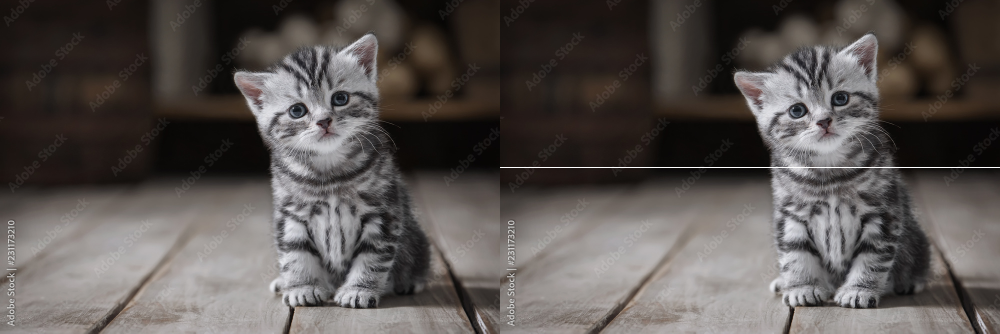

In [5]:
image_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_3 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

for y in range (lebar):
  image_3[int(tinggi/2), y] = [255, 255, 255]

final_frame = cv.hconcat([image_2, image_3])
cv2_imshow(final_frame)


# Pengolahan Citra dan Visi Komputer – Jurusan Teknologi Informasi

---

## 1. Jelaskan, mengapa pada modul praktikum ini eksekusi kode Python dilakukan menggunakan Google Colab?  
**Jawaban:**  
Karena platform ini memungkinkan mengeksekusi kode Python tanpa perlu instalasi lokal, serta menyediakan GPU (Graphics Processing Unit) dan TPU (Tensor Processing Unit) secara gratis.

---

## 2. Jelaskan mengenai kegunaan setiap library pada praktikum langkah ke delapan? Apakah semua library tersebut harus digunakan dalam praktikum sesi ini?  
**Jawaban:**  
- **NumPy** → manipulasi array numerik (gambar = array piksel).  
- **Pandas** → olah data tabular, tidak wajib di sesi ini.  
- **OpenCV (cv2)** → baca, tulis, dan proses gambar/video.  
- **cv2_imshow** → khusus untuk menampilkan gambar di Google Colab.  
- **scikit-image (io, transform)** → baca & transformasi citra (resize, rotasi, dll).  
- **PIL (Image)** → buka dan manipulasi gambar sederhana.  
- **Matplotlib (plt)** → tampilkan gambar, grafik, atau histogram.  

**Kesimpulan:** Tidak semua harus dipakai; yang utama cukup **NumPy, OpenCV, Matplotlib**, sisanya opsional.

---

## 3. Pada uji coba langkah ke-9 terdapat potongan kode program sebagai berikut:  
```python
image = cv.resize(image, (0,0), fx=0.5, fy=0.5)
````

**Jawaban:**
Kode ini berfungsi mengecilkan gambar menjadi setengah dari ukuran aslinya (50%).
Jika tidak dilakukan, gambar tetap berukuran asli sehingga bisa terlalu besar untuk diproses/ditampilkan, dan proses komputasi bisa lebih lambat.

---

## 4. Perhatikan potongan kode program berikut:

```python
for y in range(lebar):
    image_3[int(tinggi/2), y] = [255, 255, 255]
```

**Jawaban:**
`[255,255,255]` merepresentasikan warna **putih** (R=255, G=255, B=255).
Kode tersebut memberi warna putih pada baris tengah gambar (membuat garis horizontal putih).

---

## 5. Jelaskan keterkaitan antara piksel dan juga resolusi gambar yang tinggi ataupun rendah!

**Jawaban:**

* **Piksel**: Unit terkecil pada gambar digital yang menyimpan informasi warna.
* **Resolusi tinggi**: Lebih banyak piksel → detail gambar lebih jelas & tajam.
* **Resolusi rendah**: Lebih sedikit piksel → gambar tampak pecah/buram saat diperbesar.

---

# Tugas Praktikum D2

1. Lakukan langkah-langkah praktikum seperti diatas
2. Buat garis vertikal dan garis menyilang diagonal pada image keluaran

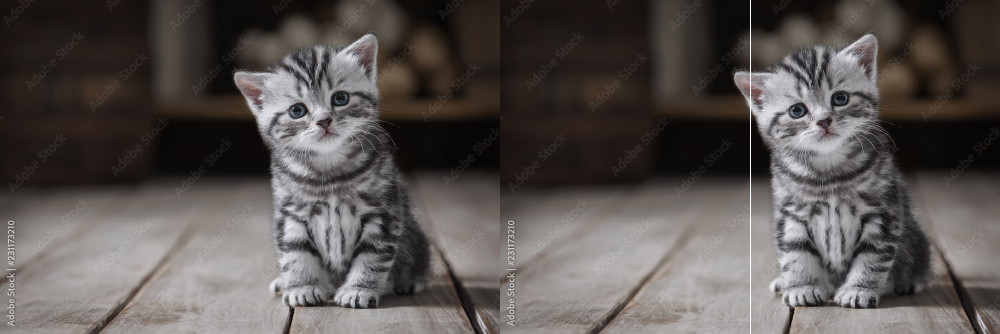

In [6]:
image_4 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_5 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Garis tengah vertikal
for y in range(tinggi):
    image_5[y, int(lebar/2)] = [255, 255, 255]

final_frame = cv.hconcat([image_4, image_5])
cv2_imshow(final_frame)


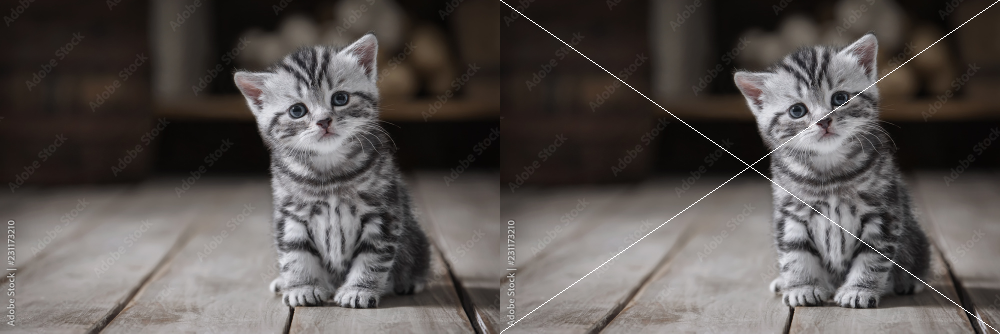

In [13]:
# Ubah ke grayscale → balik ke RGB
image_cros_1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_cros_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Slope (kemiringan) untuk menyesuaikan rasio 16:9
m = (tinggi - 1) / (lebar - 1)

# Gambar silang (X) dari pojok ke pojok
for x in range(lebar):
    # diagonal ↘ (kiri atas → kanan bawah)
    y1 = int(m * x)
    if 0 <= y1 < tinggi:
        image_cros_2[y1, x] = [255, 255, 255]

    # diagonal ↗ (kiri bawah → kanan atas)
    y2 = int(-(m * x) + (tinggi - 1))
    if 0 <= y2 < tinggi:
        image_cros_2[y2, x] = [255, 255, 255]

# Gabungkan hasil
final_frame = cv.hconcat([image_cros_1, image_cros_2])
cv2_imshow(final_frame)

3. Buat garis horisontal berwarna putih dibagian tengah gambar dengan panjang tertentu

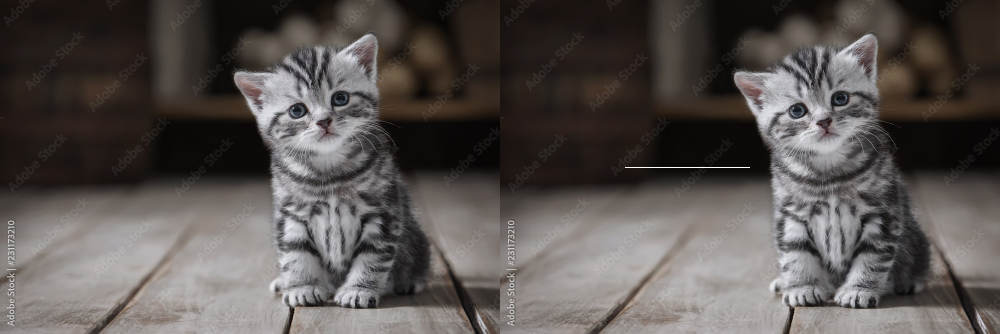

In [8]:
image_line_1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_line_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Tentukan panjang garis (misalnya setengah lebar gambar)
start_x = lebar // 4
end_x   = 2 * lebar // 4
y_pos   = tinggi // 2   # posisi tengah vertikal

# Gambar garis putih horizontal di tengah
for x in range(start_x, end_x):
    image_line_2[y_pos, x] = [255, 255, 255]

final_frame = cv.hconcat([image_line_1, image_line_2])
cv2_imshow(final_frame)

4. Buat kotak menggunakan kumpulan pixel warna putih di sembarang tempat dalam gambar

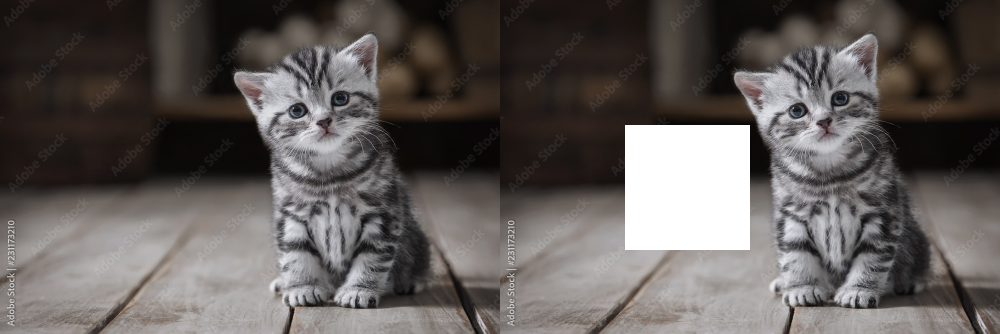

In [9]:
image_box_1 = cv.cvtColor(image, cv.COLOR_BGR2RGB)
image_box_2 = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Tentukan panjang garis (misalnya setengah lebar gambar)
start_x = lebar // 4
end_x   = 2 * lebar // 4
y_pos   = tinggi // 2   # posisi tengah vertikal

start_y = lebar // 4
end_y   = 2 * lebar // 4

# Gambar garis putih horizontal di tengah
for y in range(start_y, end_y):
  for x in range(start_x, end_x):
    image_box_2[y, x] = [255, 255, 255]


final_frame = cv.hconcat([image_box_1, image_box_2])
cv2_imshow(final_frame)